# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
import pandas as pd
import os
import numpy as np

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
**Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.**

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [2]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [3]:
from IPython.core.display import HTML
HTML(filename='/home/vinz/Desktop/ADA/ADA2017-Tutorials/02 - Intro to Pandas/Data/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

We first load the dataset in titanic.xls and display his dataframe head


### Question 1

In [4]:
columns_types = {
    'pclass': np.uint8,
    'survived': np.bool_,
    'parch': np.uint8,
    'sibsp': np.uint8,
    'age': np.float32,
    'fare': np.float32,
}

titanic = pd.read_excel('/home/vinz/Desktop/ADA/ADA2017-Tutorials/02 - Intro to Pandas/Data/titanic.xls',
                        dtype=columns_types)

Let us display the type of each attribute

In [5]:
titanic.pclass = titanic.pclass.astype('category')
titanic.sex = titanic.sex.astype('category')
titanic.embarked = titanic.embarked.astype('category')

In [6]:
titanic.pclass.cat.rename_categories(['First', 'Second', 'Third'], inplace=True)
titanic.sex.cat.rename_categories(['Female', 'Male'], inplace=True)
titanic.embarked.cat.rename_categories(['Cherbourg', 'Queenstown', 'Southampton'], inplace=True)

In [7]:
titanic.head(n=10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,First,True,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,First,True,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,First,False,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,First,False,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,First,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,First,True,"Anderson, Mr. Harry",Male,48.0000,0,0,19952,26.549999,E12,Southampton,3,NaN,"New York, NY"
6,First,True,"Andrews, Miss. Kornelia Theodosia",Female,63.0000,1,0,13502,77.958298,D7,Southampton,10,NaN,"Hudson, NY"
7,First,False,"Andrews, Mr. Thomas Jr",Male,39.0000,0,0,112050,0.000000,A36,Southampton,NaN,NaN,"Belfast, NI"
8,First,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",Female,53.0000,2,0,11769,51.479198,C101,Southampton,D,NaN,"Bayside, Queens, NY"
9,First,False,"Artagaveytia, Mr. Ramon",Male,71.0000,0,0,PC 17609,49.504200,NaN,Cherbourg,NaN,22.0,"Montevideo, Uruguay"


In [8]:
titanic.dtypes

pclass       category
survived         bool
name           object
sex          category
age           float32
sibsp           uint8
parch           uint8
ticket         object
fare          float32
cabin          object
embarked     category
boat           object
body          float64
home.dest      object
dtype: object

In [9]:
# Describe range of numeric variables
titanic[['age', 'sibsp', 'parch', 'fare']].describe().transpose()[['min', 'max']]

,min,max
age,0.1667,80.000000
sibsp,0.0000,8.000000
parch,0.0000,9.000000
fare,0.0000,512.329224


### Question 2

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

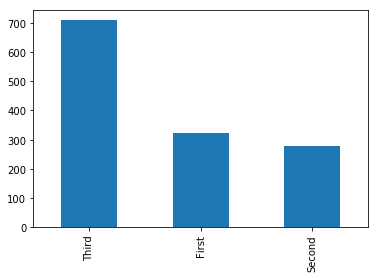

In [11]:
titanic.pclass.value_counts().plot(kind='bar')

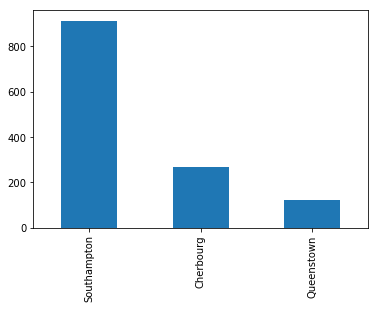

In [12]:
titanic.embarked.value_counts().plot(kind='bar')

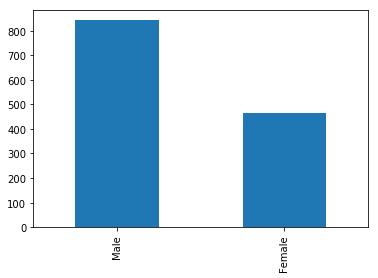

In [13]:
titanic.sex.value_counts().plot(kind='bar')

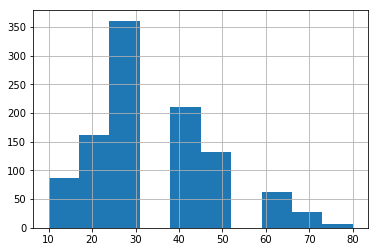

In [14]:
pd.cut(titanic.age, [0, 10, 20, 30, 40, 50, 60, 70, 80], labels=[10, 20, 30, 40, 50, 60, 70, 80]).hist()

### Question 3

In [15]:
floor_counts = titanic.cabin.copy()\
                            .str.extract('([A-Z])')\
                            .dropna()\
                            .value_counts()

/home/vinz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


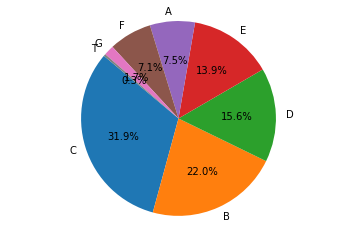

In [16]:
plt.pie(floor_counts, labels=floor_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

### Question 4

In [17]:
survived = titanic[['pclass', 'survived']].groupby('pclass')\
                                          .mean()

In [18]:
survived

,survived
pclass,
First,0.619195
Second,0.429603
Third,0.255289


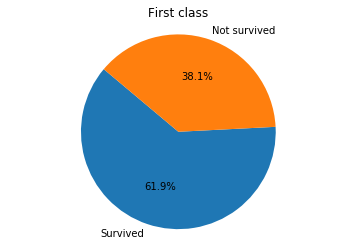

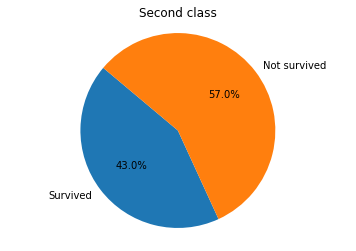

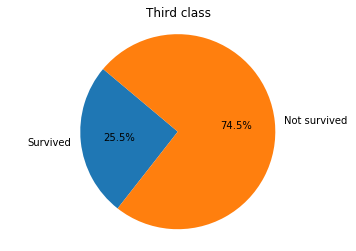

In [19]:
labels = 'Survived', 'Not survived'

for class_ in titanic.pclass.cat.categories:
    ratios = survived['survived'][class_], 1 - survived['survived'][class_]
    plt.pie(ratios, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(' '.join([class_, 'class']))
    plt.show()

### Question 5

In [20]:
survival_rates_class_sex = titanic.set_index(['pclass','sex'])\
                                  .groupby(level=('pclass','sex'),axis=0)[['survived']]\
                                  .mean()

In [21]:
survival_rates_class_sex

survived
pclass sex             
First  Female  0.965278
       Male    0.340782
Second Female  0.886792
       Male    0.146199
Third  Female  0.490741
       Male    0.152130

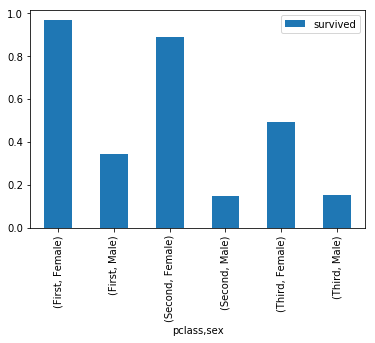

In [23]:
survival_rates_class_sex.plot.bar()

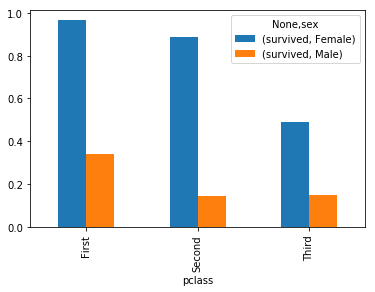

In [29]:
survival_rates_class_sex.unstack().plot.bar()

### Question 6

In [134]:
titanic2 = titanic.dropna(subset=['age']).copy()

In [135]:
titanic_ages = pd.cut(titanic.age, [0, titanic2.age.median(), titanic2.age.max()], labels=['young','old'])
titanic2['age'] = titanic_ages

In [136]:
result = titanic2.groupby(('pclass','sex','age'),axis=0)[['survived']]\
                 .mean()\
                 .round(3)\
                 .unstack('age')

In [137]:
result

survived       
age                old  young
pclass sex                   
First  Female    0.967  0.951
       Male      0.303  0.531
Second Female    0.872  0.911
       Male      0.083  0.216
Third  Female    0.372  0.514
       Male      0.144  0.183

In [65]:
result.index.is_unique

True